https://github.com/mica5/statistics/blob/master/statistics.ipynb

# Introduction

Any data here, unless otherwise stated, is from the book Probability and Statistics for Engineering and the Sciences, 9th Edition, by Jay Devore (CENGAGE Learning). https://www.amazon.com/Probability-Statistics-Engineering-Sciences-Devore/dp/1305251806 ; many of concepts here are from there and also from taking MATH161A at SJSU (San Jose State University in San Jose, California) in Spring 2018.


In [183]:
# these are standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Stratified Sampling

In [9]:
from sklearn.model_selection import train_test_split

i = 100

# generate lists. it will look like [0, 0, ..., 0, 1, 1, ..., 1], where there are twice as many 1s as there are 0s
population = [0]*i + [1]*i*2
# the category is used to first split all the data by categories, then random sampling will be taken from within each category. but the way stratified sampling is meant to happen is that the number of items selected in each category compared to the number of items selected from the other categories is roughly proportional to the number of items in that category compared to the number of items in the population. that way, each category should get a representational sample, instead of categories with more items compared to the number in other catgories getting underrepresented compared to categories that have very few items.
category = [0]*i + [1]*i*2
# we should have twice as many 1s as we have 0s

# take the stratified sample. by default, based on sklearn version 0.19.1, the sample will be 75% of the population (by default, test is 25%, and train is the complement of test, so train will be 75%)
sample, _ = train_test_split(population, stratify=category)

# count the number of 0s and ones
c0 = sample.count(0)
c1 = sample.count(1)
total = c0 + c1
# here are the proportions.
print('proportion of 0s:', c0 / total)
print('proportion of 1s:', c1 / total)
print('all added together to make sure it adds to 1:', (c0+c1)/total)
print('number of 1s compared to 0s, which should be 2:', c1/c0)

proportion of 0s: 0.3333333333333333
proportion of 1s: 0.6666666666666666
all added together to make sure it adds to 1: 1.0
number of 1s compared to 0s, which should be 2: 2.0


# Stem and leaf display

In [10]:
# presidential Commission on the Space Shuttle Challenger Accident, Vol. 1, 1986: 129-131
o_ring_temperatures = [84, 49, 61, 40, 83, 67, 45, 66, 70, 69, 80, 58, 68, 60, 67, 72, 73, 70, 57, 63, 70, 78, 52, 67, 53, 67, 75, 61, 70, 81, 76, 79, 75, 76, 58, 31]

def stem_and_leaf_display(data):
    """print a stem-and-leaf display to standard output

    This is a very primitive algorithm, as it only works for
    two-digit numbers. It is only for demonstrative purposes.
    """
    sld = dict()
    for n in data:
        stem = str(n)[0]
        if stem not in sld:
            sld[stem] = list()
        sld[stem].append(str(n)[-1])
    lowkey = min(sld.keys())
    highkey = max(sld.keys())
    for i in range(int(lowkey), int(highkey)+1, 1):
        i = '{}'.format(i)
        if i not in sld:
            sld[i] = list()
    for stem in sorted(sld.keys()):
        print(stem+'|', end='')
        for value in sorted(sld[stem]):
            print(value, end='')
        print()
stem_and_leaf_display(o_ring_temperatures)

3|1
4|059
5|23788
6|01136777789
7|000023556689
8|0134


# Notation

An example sample: {6.3, 6.2, 5.9, 6.5}, and an example population that sample was drawn from: {6.3, 4.8, 6.2, 7.6, 5.9, 6.4, 6.5, 5.9}<br>
n=4, where n is the number of observations in the sample.<br>
When considering more than one sample, we can use $n$ and $m$ or $n_1$ and $n_2$.

Letters like x, y, and z are used to denote variables, e.g. length/height/width/age/...<br>
When considering the variable for multiple samples, we can use $x_1, x_2, x_3, \dots, x_n$. The subscribt number is the observation number, like the id in a database, which typically has no relationship to the values themselves.

# Discrete vs continuous data

Continuous data can be any decimal number, e.g. although we often truncate a temperature when we're talking about it like "71 degrees fahrenheit", temperature is continuous because it's actually (for example) 71.56209 degrees fahrenheit. We don't usually talk about the decimal place unless we're dealing with statistics/science/data.<br>
Discrete data is like the number of times something happened. Either you went to the store or you didn't; you can't go to the store a half of a time. So the number of times you went to the store will always either be 0 or a multiple of 1 (never a decimal place).

The stem-and-leaf display is good for discrete data, but gets complicated or impractical for continuous data. For continuous data, a more appropriate plot might be a histogram or a beeswarm plot (although a histogram could be used for discrete data).

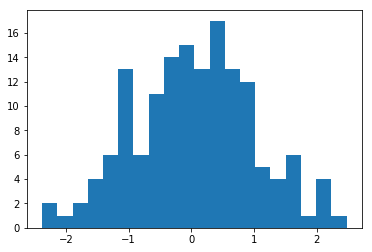

A histogram shows a frequency distribution


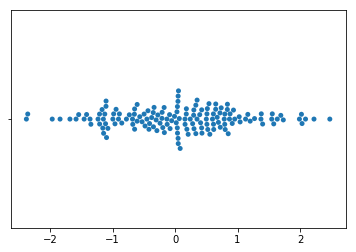

A beeswarm plot shows the exact values, whereas a histogram shows aggregates grouped by ranges.


In [50]:
np.random.seed(4)
data = np.random.normal(size=150)

plt.hist(data, bins=20)
plt.show()
print("A histogram shows a frequency distribution")

sns.swarmplot(data)
plt.show()
print("A beeswarm plot shows the exact values, whereas a histogram shows aggregates grouped by ranges.")


Devore, 16<br>
frequency: total number of times a particular observation is observed<br>
$\text{relative frequency of a value} = \frac{\text{number of times the value occurs}}{\text{number of observations in the data set}}$


# Histograms and modality

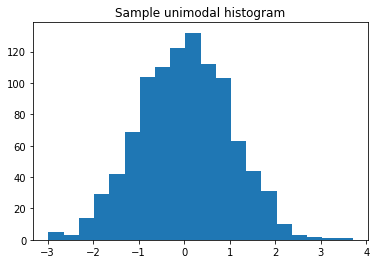

In [174]:
np.random.seed(3)
data = np.random.normal(size=1000)
plt.hist(data, bins=20)
plt.title('Sample unimodal histogram')
plt.show()

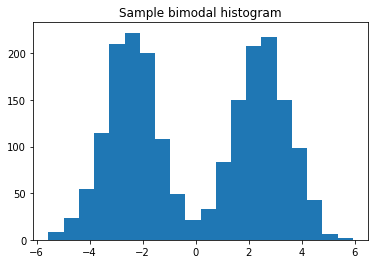

In [168]:
i = 2.5
np.random.seed(1)
data1 = np.random.normal(-i, size=1000)
data2 = np.random.normal(i, size=1000)
data = np.concatenate((data1, data2))
plt.hist(data, bins=20)
plt.title('Sample bimodal histogram')
plt.show()

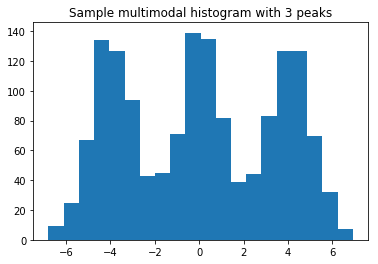

In [181]:
i = 4
size = 500
np.random.seed(1)
a, b, c = np.linspace(-i, i, 3)
data1 = np.random.normal(a, size=size)
data2 = np.random.normal(b, size=size)
data3 = np.random.normal(c, size=size)
data = np.concatenate((data1, data2, data3))
plt.hist(data, bins=20)
plt.title('Sample multimodal histogram with 3 peaks')
plt.show()

# Categories

In [189]:
letter_grades = [c for c in 'ABCDF']
grades = pd.Categorical(letter_grades, ordered=True, categories=letter_grades[::-1])
grades

[A, B, C, D, F]
Categories (5, object): [F < D < C < B < A]

In [191]:
student_standing = 'freshmen, sophomores, juniors, seniors, graduate students'.split(', ')
student_standing_categories = pd.Categorical(student_standing, ordered=True, categories=student_standing)
student_standing_categories

[freshmen, sophomores, juniors, seniors, graduate students]
Categories (5, object): [freshmen < sophomores < juniors < seniors < graduate students]